# Analysis of SAF primitive characterization results

`primitives_table.csv` is for the SAFTools Accelergy estimator to look up action energies and component areas. The primitives table summarizes characterization results for key SAF primitive components. This notebook analyzes & sanity-checks the characterization results.

In [83]:
#%pip install pandas
#%pip install csv
#%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Sanity-check characterization testbench

## Characterization data

In [85]:
df=pd.read_csv('accelergy/data/primitives_table.csv')
df=df[["name","critical_path_length","action_energy","absolute_total_area","combinational_area"]]
characterization_df=df[df["name"].str.contains("Registered") & ((~(df["name"].str.contains("bitwidth1"))) | df["name"].str.contains("bitwidth16"))]
characterization_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'accelergy/data/primitives_table.csv'

## Reference data

**Notes:**
* *Registered{Adder,Multiplier}_bitwidth16*: numbers from Accelergy table estimator
* *Registered{Adder,Multiplier}_bitwidth32*: numbers from Aladdin table estimator
* Here Aladdin "dynamic energy(pJ)" is used as a stand-in for "action energy"

In [ ]:
data = {'name': ['RegisteredAdder_bitwidth16', 'RegisteredAdder_bitwidth32','RegisteredMultiplier_bitwidth16','RegisteredMultiplier_bitwidth32'],
        'critical_path_length': [5.0,5.0,5.0,5.0],
        'action_energy': [1.0,0.0857,1.0,8.63],
        'absolute_total_area': [0,179.0,0,4600.0],
        'reference_citation': ['accelergy_tables','aladdin_tables','accelergy_tables','aladdin_tables']
        }
df = pd.DataFrame(data)
df

,name,critical_path_length,action_energy,absolute_total_area,reference_citation
0,RegisteredAdder_bitwidth16,5.0,1.0000,0.0,accelergy_tables
1,RegisteredAdder_bitwidth32,5.0,0.0857,179.0,aladdin_tables
2,RegisteredMultiplier_bitwidth16,5.0,1.0000,0.0,accelergy_tables
3,RegisteredMultiplier_bitwidth32,5.0,8.6300,4600.0,aladdin_tables


## Multiplier analysis

In [ ]:
aladdin_32bit_multiplier_data = {'critical_path_length': [0.5,1.0,2.0,3.0,4.0,5.0,6.0,10.0],
        'action_energy': [18.94,12.68,9.55,8.8,8.66,8.63,8.63,8.8],
        'absolute_total_area': [8340,6350,5140,4970,4620,4600,4600,4600],
        'stages': [3,1,1,1,1,1,1,1],
        }
aladdin_32bit_multiplier_df = pd.DataFrame(aladdin_32bit_multiplier_data)
aladdin_32bit_multiplier_df

,critical_path_length,action_energy,absolute_total_area,stages
0,0.5,18.94,8340,3
1,1.0,12.68,6350,1
2,2.0,9.55,5140,1
3,3.0,8.80,4970,1
4,4.0,8.66,4620,1
5,5.0,8.63,4600,1
6,6.0,8.63,4600,1
7,10.0,8.80,4600,1


In [ ]:
char_mult_df=characterization_df[characterization_df['name']=='RegisteredMultiplier_bitwidth32']
char_mult_df.head()

,name,critical_path_length,action_energy,absolute_total_area,combinational_area
20,RegisteredMultiplier_bitwidth32,0.54,53.525,6129.5273,5435.4326


In [ ]:
pd.to_numeric(aladdin_32bit_multiplier_df['action_energy']).to_numpy()

array([18.94, 12.68,  9.55,  8.8 ,  8.66,  8.63,  8.63,  8.8 ])

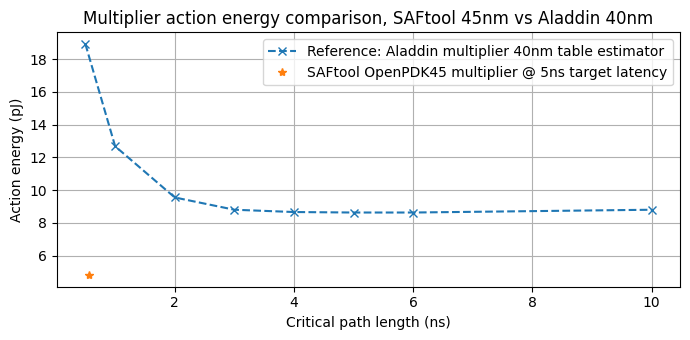

In [92]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(pd.to_numeric(aladdin_32bit_multiplier_df['critical_path_length']).to_numpy(),pd.to_numeric(aladdin_32bit_multiplier_df['action_energy']).to_numpy(),'--x')
plt.plot(pd.to_numeric(char_mult_df['critical_path_length']).to_numpy(),0.73*pd.to_numeric(char_mult_df['action_energy']).to_numpy(),'*')
plt.grid(True)
plt.xlabel('Critical path length (ns)')
plt.ylabel('Action energy (pJ)')
plt.legend(['Reference: Aladdin multiplier 40nm table estimator','SAFtool OpenPDK45 multiplier @ 5ns target latency'])
plt.title('Multiplier action energy comparison, SAFtool 45nm vs Aladdin 40nm')
plt.show()

In [91]:
pd.to_numeric(char_mult_df['action_energy']).to_numpy()

array([4.8])

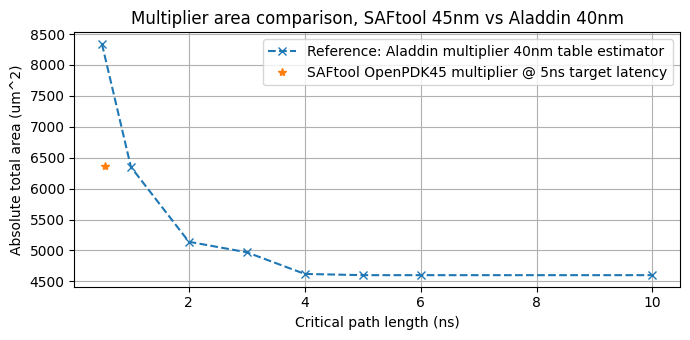

In [88]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(pd.to_numeric(aladdin_32bit_multiplier_df['critical_path_length']).to_numpy(),pd.to_numeric(aladdin_32bit_multiplier_df['absolute_total_area']).to_numpy(),'--x')
plt.plot(pd.to_numeric(char_mult_df['critical_path_length']).to_numpy(),pd.to_numeric(char_mult_df['absolute_total_area']).to_numpy(),'*')
plt.grid(True)
plt.xlabel('Critical path length (ns)')
plt.ylabel('Absolute total area (um^2)')
plt.legend(['Reference: Aladdin multiplier 40nm table estimator','SAFtool OpenPDK45 multiplier @ 5ns target latency'])
plt.title('Multiplier area comparison, SAFtool 45nm vs Aladdin 40nm')
plt.show()

## Adder comparison

In [ ]:
aladdin_32bit_adder_data = {'critical_path_length': [0.5,1.0,2.0,3.0,4.0,5.0,6.0,10.0],
        'action_energy': [0.142,0.21,0.0858,0.0859,0.0857,0.0857,0.0857,0.0853],
        'absolute_total_area': [379,278,179,179,179,179,179,179],
        'stages': [1,1,1,1,1,1,1,1],
        }
aladdin_32bit_adder_df = pd.DataFrame(aladdin_32bit_adder_data)
aladdin_32bit_adder_df

,critical_path_length,action_energy,absolute_total_area,stages
0,0.5,0.1420,379,1
1,1.0,0.2100,278,1
2,2.0,0.0858,179,1
3,3.0,0.0859,179,1
4,4.0,0.0857,179,1
5,5.0,0.0857,179,1
6,6.0,0.0857,179,1
7,10.0,0.0853,179,1


In [ ]:
char_adder_df=characterization_df[characterization_df['name']=='RegisteredAdder_bitwidth32']
char_adder_df.head()

,name,critical_path_length,action_energy,absolute_total_area,combinational_area
16,RegisteredAdder_bitwidth32,0.23,49.855,1455.2993,920.7666


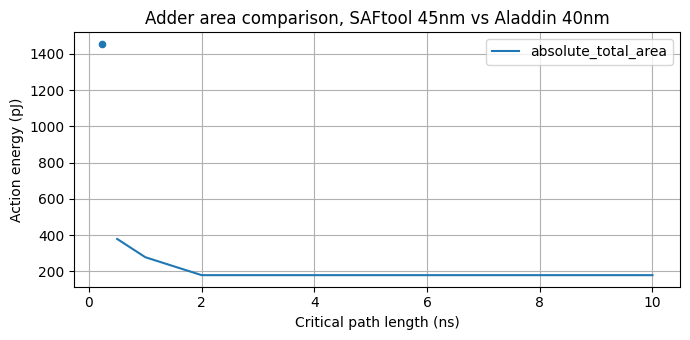

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax=aladdin_32bit_adder_df.plot(x='critical_path_length',y='absolute_total_area')

char_adder_df.plot(ax=ax,x='critical_path_length',y='absolute_total_area',kind='scatter')
plt.grid(True)
plt.xlabel('Critical path length (ns)')
plt.ylabel('Action energy (pJ)')
plt.title('Adder area comparison, SAFtool 45nm vs Aladdin 40nm')
plt.show()

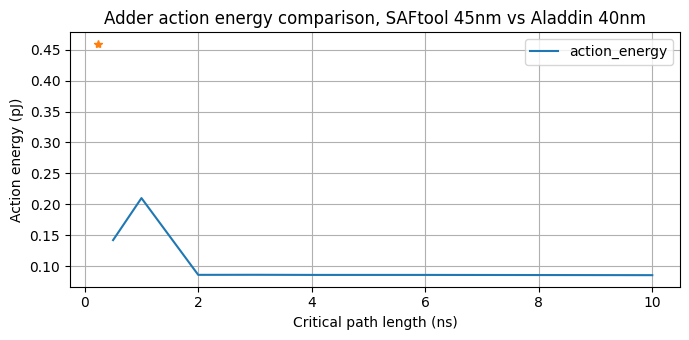

In [87]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax=aladdin_32bit_adder_df.plot(x='critical_path_length',y='action_energy')
plt.plot(pd.to_numeric(char_adder_df['critical_path_length']).to_numpy(),0.4595,'*')
#char_adder_df.plot(ax=ax,x='critical_path_length',y='action_energy',kind='scatter')
plt.grid(True)
plt.xlabel('Critical path length (ns)')
plt.ylabel('Action energy (pJ)')
plt.title('Adder action energy comparison, SAFtool 45nm vs Aladdin 40nm')
plt.show()